<a href="https://colab.research.google.com/github/2303a52163/EXPLAINABLE-AI-LAB/blob/main/XAI_LAB_ASSIGNMENT_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
%pip install lime

In [30]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# XAI
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.inspection import PartialDependenceDisplay

# DL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, LSTM, Input, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

import joblib
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 200)


Shape (rows, cols): (400, 26)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

None


Missing values per column:


,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4



Summary Statistics:


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5,3,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251,258,362,317,323,339,248
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Detected target column: classification

Class distribution (absolute):
classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

Class distribution (fraction):
classification
ckd       0.620
notckd    0.375
ckd\t     0.005
Name: proportion, dtype: float64


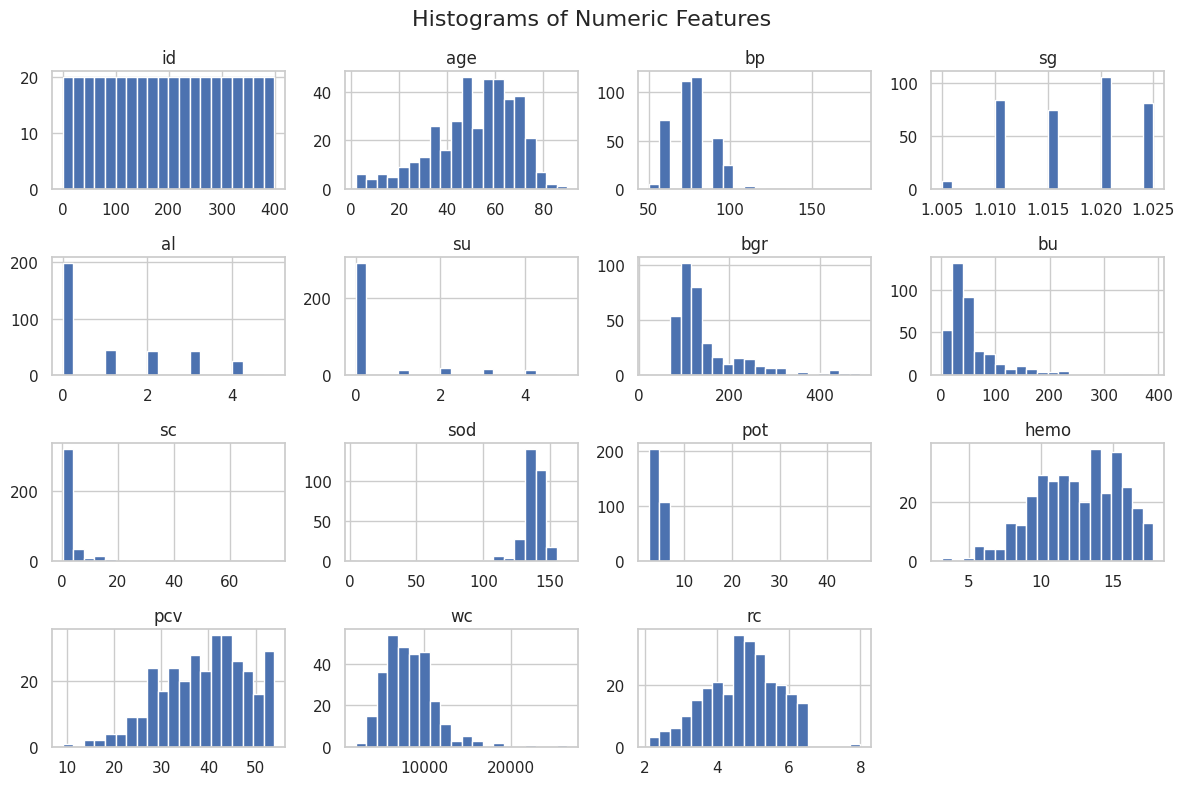

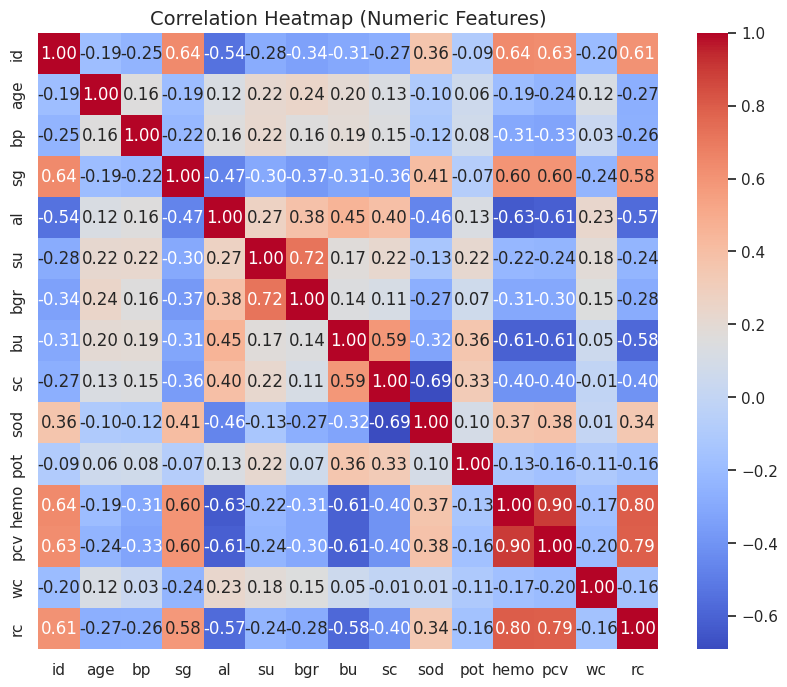

In [31]:
# ============================================================
# Part 1: Exploratory Data Analysis (EDA)
# ============================================================

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 200)

# ---------------- Load Data ----------------
df = pd.read_csv("kidney_disease.csv", na_values=['?','NA','',' '])
print("Shape (rows, cols):", df.shape)

# First look at data
display(df.head())
display(df.info())

# ---------------- Missing Values ----------------
print("\nMissing values per column:")
display(df.isnull().sum())

# ---------------- Numeric Conversion ----------------
for col in df.columns:
    if df[col].dtype == object:
        coerced = pd.to_numeric(df[col].astype(str).str.strip(), errors='coerce')
        if coerced.notnull().sum() > 0.3 * len(df):  # keep only if mostly numeric
            df[col] = coerced

# ---------------- Descriptive Statistics ----------------
print("\nSummary Statistics:")
display(df.describe(include='all'))

# ---------------- Target Column Detection ----------------
candidates = [c for c in df.columns if c.lower() in
              ('class','classification','target','diagnosis','status','label')]
target = candidates[0] if candidates else df.columns[-1]
print("\nDetected target column:", target)

print("\nClass distribution (absolute):")
print(df[target].value_counts(dropna=False))

print("\nClass distribution (fraction):")
print(df[target].value_counts(normalize=True, dropna=False))

# ---------------- Histograms ----------------
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target in num_cols and not pd.api.types.is_numeric_dtype(df[target]):
    num_cols.remove(target)

if num_cols:
    df[num_cols].hist(bins=20, figsize=(12,8))
    plt.suptitle("Histograms of Numeric Features", fontsize=16)
    plt.tight_layout()
    plt.show()

# ---------------- Correlation Heatmap ----------------
cols_for_corr = [col for col in num_cols if col != target]
if cols_for_corr:
    plt.figure(figsize=(10,8))
    sns.heatmap(df[cols_for_corr].corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap (Numeric Features)", fontsize=14)
    plt.show()
else:
    print("No numeric columns available for correlation heatmap after excluding target.")


In [32]:
# ============================================================
# Part 2: Preprocessing
# ============================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import numpy as np # Ensure numpy is imported

X = df.drop(columns=[target])
y = df[target]

# Encode target
if y.dtype == object:
    y = LabelEncoder().fit_transform(y.astype(str))

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols)

# Pipelines
num_pipe = Pipeline([('imp', SimpleImputer(strategy='median')), ('sc', StandardScaler())])
# Use sparse_output=False for OneHotEncoder in newer scikit-learn versions
cat_pipe = Pipeline([('imp', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
preprocessor = ColumnTransformer([('num', num_pipe, num_cols), ('cat', cat_pipe, cat_cols)])

X_proc = preprocessor.fit_transform(X)

# Get feature names after preprocessing
ohe_feature_names = []
if cat_cols:
    ohe_transformer = preprocessor.named_transformers_['cat'].named_steps['ohe']
    # Check if the transformer has get_feature_names_out
    if hasattr(ohe_transformer, 'get_feature_names_out'):
        ohe_feature_names = list(ohe_transformer.get_feature_names_out(cat_cols))

feature_names = num_cols + ohe_feature_names
X_proc = pd.DataFrame(X_proc, columns=feature_names) # Convert back to DataFrame

X_train, X_test, y_train, y_test = train_test_split(X_proc, y, test_size=0.2, stratify=y, random_state=42)
print("Before SMOTE:", np.bincount(y_train))
sm = SMOTE(random_state=42, k_neighbors=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("After SMOTE:", np.bincount(y_train_res))

Numeric cols: ['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
Categorical cols: ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
Before SMOTE: [198   2 120]
After SMOTE: [198 198 198]


In [33]:
# ============================================================
# Part 3: Machine Learning Models
# ============================================================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np # Import numpy for unique checks

def eval_model(model, name):
    global X_tr, y_tr # Access variables defined in the scope outside the function

    # Add a check for valid training data before fitting
    if X_tr is None or y_tr is None or (isinstance(y_tr, np.ndarray) and len(np.unique(y_tr)) <= 1):
         print(f"\nSkipping training for {name}: Invalid training data (X_tr or y_tr is None, or y_tr has only one class).")
         # Return None results if training is skipped
         return {
             "Model": name,
             "Accuracy": None,
             "Precision": None,
             "Recall": None,
             "F1": None,
             "ROC_AUC": None
         }, None

    print(f"\nTraining: {name}")
    model.fit(X_tr, y_tr) # Use X_tr and y_tr for training

    y_pred = model.predict(X_test)

    # Add print statements for unique labels in y_test and y_pred for debugging
    print(f"Unique labels in y_test: {np.unique(y_test)}")
    print(f"Unique labels in y_pred: {np.unique(y_pred)}")

    # Check if y_test has more than one class for appropriate metric calculation
    if len(np.unique(y_test)) > 1:
        # Calculate metrics using average='macro' for multi-class
        res = {
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            # Use average='macro' for multi-class precision, recall, f1
            "Precision": precision_score(y_test, y_pred, average='macro', zero_division=0),
            "Recall": recall_score(y_test, y_pred, average='macro', zero_division=0),
            "F1": f1_score(y_test, y_pred, average='macro', zero_division=0),
        }
        # ROC AUC requires probabilities and typically binary classification
        y_prob = None
        if hasattr(model,"predict_proba"):
            y_prob = model.predict_proba(X_test)


            if y_prob is not None and y_prob.shape[1] == 2:
                 res["ROC_AUC"] = roc_auc_score(y_test, y_prob[:, 1])
            elif len(np.unique(y_test)) == 2:
                 try:
                     if hasattr(model, "decision_function"):
                          y_scores = model.decision_function(X_test)
                          res["ROC_AUC"] = roc_auc_score(y_test, y_scores)
                 except Exception as e:
                      print(f"Could not calculate ROC_AUC for {name}: {e}")
                      res["ROC_AUC"] = None
            else:
                 # Multi-class y_test, default ROC_AUC is not directly applicable
                 res["ROC_AUC"] = None # Keep as None for multi-class

        else:
             res["ROC_AUC"] = None # Model does not have predict_proba or decision_function

        print(f"\n{name}\n", classification_report(y_test, y_pred, zero_division=0))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    else: # y_test contains only one unique class
        print(f"\nSkipping evaluation for {name}: y_test contains only one class.")
        res = {
             "Model": name,
             "Accuracy": accuracy_score(y_test, y_pred), # Accuracy can still be calculated
             "Precision": None, # Other metrics are not meaningful with one class
             "Recall": None,
             "F1": None,
             "ROC_AUC": None
        }
        # Print a basic report if possible, but classification_report might fail
        try:
             print(f"\n{name}\n", classification_report(y_test, y_pred, zero_division=0))
             print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        except Exception as e:
             print(f"Could not generate full report for {name}: {e}")


    return res, model

required_vars_for_eval = ['X_train', 'y_train', 'X_test', 'y_test']
if not all(v in globals() and globals()[v] is not None for v in required_vars_for_eval):
     print("Error: Required variables (X_train, y_train, X_test, y_test) are not defined.")
     print("Please run the preprocessing and train-test split cells (IaK2bk4Cu6W and DkSHvHS6GGaq) first.")
     results = [] # Initialize results to empty list
     trained = {} # Initialize trained to empty dict
else:
    # Prepare X_tr and y_tr based on whether SMOTE was applied
    # This logic was previously in the cell before this one. Let's put it here for clarity.
    X_tr, y_tr = (X_train_res, y_train_res) if 'X_train_res' in globals() and 'y_train_res' in globals() and X_train_res is not None and y_train_res is not None and len(np.unique(y_train_res)) > 1 else (X_train, y_train)

    # Check if X_tr and y_tr are valid before proceeding with model loop
    if X_tr is None or y_tr is None or (isinstance(y_tr, np.ndarray) and len(np.unique(y_tr)) <= 1):
        print("Error: Invalid training data (X_tr or y_tr is None, or y_tr has only one class) before model training loop.")
        print("Please ensure you have run the data loading, preprocessing, and optionally SMOTE cells (IaK2bk4Cu6W, DkSHvHS6GGaq, and pHiA3RAd7Uyf) first.")
        results = [] # Initialize results to empty list
        trained = {} # Initialize trained to empty dict
    else:
        models = {
            "LogReg": LogisticRegression(max_iter=1000),
            "DecisionTree": DecisionTreeClassifier(),
            "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
            "KNN": KNeighborsClassifier(n_neighbors=5),
            "SVM": SVC(probability=True), # Set probability=True for predict_proba
            "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
            "GradBoost": GradientBoostingClassifier()
        }

        results = []
        trained = {}
        for name, m in models.items():
            # The eval_model function now includes a check for valid X_tr, y_tr
            res, model = eval_model(m, name)
            if res['Accuracy'] is not None: # Only append if training was attempted
                 results.append(res)
                 trained[name] = model # Store trained model only if successful


if results: # Check if results list is not empty before creating DataFrame
    ml_results = pd.DataFrame(results).sort_values("F1", ascending=False)
    display(ml_results)
else:
    print("No models were trained successfully.")


Training: LogReg
Unique labels in y_test: [0 2]
Unique labels in y_pred: [0 2]
Could not calculate ROC_AUC for LogReg: multi_class must be in ('ovo', 'ovr')

LogReg
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:
 [[50  0]
 [ 0 30]]

Training: DecisionTree
Unique labels in y_test: [0 2]
Unique labels in y_pred: [0 2]

DecisionTree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:
 [[50  0]
 [ 0 30]]

T

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,LogReg,1.000,1.000000,1.000000,1.000000,NaN
1,DecisionTree,1.000,1.000000,1.000000,1.000000,NaN
2,RandomForest,1.000,1.000000,1.000000,1.000000,NaN
4,SVM,1.000,1.000000,1.000000,1.000000,NaN
5,XGBoost,1.000,1.000000,1.000000,1.000000,NaN
6,GradBoost,1.000,1.000000,1.000000,1.000000,NaN
3,KNN,0.975,0.655914,0.653333,0.654399,NaN


In [34]:
# ============================================================
# Part 4: Deep Learning Models
# ============================================================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # Import individual metrics
import numpy as np # Import numpy for unique checks

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

required_vars_for_dl = ['X_train', 'y_train', 'X_test', 'y_test']
if not all(v in globals() and globals()[v] is not None for v in required_vars_for_dl):
    print("Error: Required variables (X_train, y_train, X_test, y_test) are not defined.")
    print("Please run the preprocessing and train-test split cells (DkSHvHS6GGaq) first.")
    # Set Xtr, Xte, ytr, yte to None or empty to skip training
    Xtr, Xte, ytr, yte = None, None, None, None
else:
    # Logic to select training data (SMOTE or original)
    X_tr_selected, y_tr_selected = (X_train_res, y_train_res) if 'X_train_res' in globals() and 'y_train_res' in globals() and X_train_res is not None and y_train_res is not None and len(np.unique(y_train_res)) > 1 else (X_train, y_train)

    # Convert to numpy arrays for TensorFlow
    # Check if selected training data is valid before converting and proceeding
    if X_tr_selected is None or y_tr_selected is None or (isinstance(y_tr_selected, np.ndarray) and len(np.unique(y_tr_selected)) <= 1):
        print("Error: Invalid training data (X_tr_selected or y_tr_selected is None, or y_tr_selected has only one class) before Deep Learning models.")
        print("Please ensure you have run the data loading, preprocessing, and optionally SMOTE cells (IaK2bk4Cu6W, DkSHvHS6GGaq, and pHiA3RAd7Uyf) first.")
        # Set Xtr, Xte, ytr, yte to None or empty to skip training
        Xtr, Xte, ytr, yte = None, None, None, None
    else:
        Xtr = X_tr_selected.values if hasattr(X_tr_selected, 'values') else X_tr_selected
        ytr = y_tr_selected if isinstance(y_tr_selected, np.ndarray) else y_tr_selected.values # Ensure ytr is numpy array
        Xte = X_test.values if hasattr(X_test, 'values') else X_test
        yte = y_test if isinstance(y_test, np.ndarray) else y_test.values # Ensure yte is numpy array


def eval_dl(model, Xte, yte, name):
    if Xte is None or yte is None or len(np.unique(yte)) <= 1:
         print(f"\nSkipping evaluation for {name}: Invalid test data (Xte or yte is None, or yte has only one class).")
         return {
             "Model": name,
             "Accuracy": None,
             "Precision": None,
             "Recall": None,
             "F1": None,
             "ROC_AUC": None
         }


    y_prob = model.predict(Xte) # This will be shape (n_samples, 1) for sigmoid, (n_samples, n_classes) for softmax
    if y_prob.shape[-1] == 1: # Binary classification (sigmoid output)
        y_prob = y_prob.ravel() # Flatten to 1D array
        y_pred = (y_prob >= 0.5).astype(int) # Threshold for binary prediction


        yte_eval = np.copy(yte)

        if len(np.unique(yte_eval)) > 1 and 2 in np.unique(yte_eval):
             yte_eval[yte_eval == 2] = 1 # Temporarily map label 2 to 1 for binary evaluation

        # Check if yte_eval is now binary for binary metrics
        if len(np.unique(yte_eval)) == 2:
             res = {
                 "Model": name,
                 "Accuracy": accuracy_score(yte_eval, y_pred),
                 "Precision": precision_score(yte_eval, y_pred, zero_division=0), # Use default binary average
                 "Recall": recall_score(yte_eval, y_pred, zero_division=0),      # Use default binary average
                 "F1": f1_score(yte_eval, y_pred, zero_division=0),              # Use default binary average
                 "ROC_AUC": roc_auc_score(yte_eval, y_prob)
             }
             print(f"\n{name} (Binary Evaluation)\n", classification_report(yte_eval, y_pred, zero_division=0))
             print("Confusion Matrix:\n", confusion_matrix(yte_eval, y_pred))
        else:
             print(f"\nSkipping binary evaluation for {name}: yte_eval is not binary after mapping.")
             res = {
                 "Model": name, "Accuracy": None, "Precision": None,
                 "Recall": None, "F1": None, "ROC_AUC": None
             }

    else: # Multi-class classification (softmax output)
        y_pred = np.argmax(y_prob, axis=1) # Get predicted class index

        # Use average='macro' or 'weighted' for multi-class metrics
        res = {
            "Model": name,
            "Accuracy": accuracy_score(yte, y_pred),
            "Precision": precision_score(yte, y_pred, average='macro', zero_division=0), # Use macro average
            "Recall": recall_score(yte, y_pred, average='macro', zero_division=0),      # Use macro average
            "F1": f1_score(yte, y_pred, average='macro', zero_division=0),              # Use macro average
            "ROC_AUC": None # ROC AUC is tricky for multi-class, leave as None or implement OvR/OvA
        }
        print(f"\n{name} (Multi-class Evaluation)\n", classification_report(yte, y_pred, zero_division=0))
        print("Confusion Matrix:\n", confusion_matrix(yte, y_pred))

    # Add print statements for unique labels in yte and y_pred for debugging
    print(f"Unique labels in yte: {np.unique(yte)}")
    print(f"Unique labels in y_pred: {np.unique(y_pred)}")


    return res

# --- Model Training and Evaluation ---
# Check if training data is valid before proceeding with model training
if Xtr is not None and ytr is not None and len(np.unique(ytr)) > 1:
    num_classes_train = len(np.unique(ytr))
    if num_classes_train > 2:
         print(f"\nWarning: Training data has {num_classes_train} classes, but models are configured for binary classification (sigmoid output).")
         print("Consider changing model architecture (output layer, activation, loss) if multi-class classification is intended.")
         # As a temporary measure for evaluation, eval_dl attempts to handle multi-class yte.

    print("\n--- Deep Learning Model Training ---")

    mlp_res = None # Initialize results to None
    try:
        mlp = Sequential([Input(shape=(Xtr.shape[1],)), Dense(64,activation='relu'),
                          Dense(32,activation='relu'), Dense(1,activation='sigmoid')]) # Binary output
        mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        print("Training MLP...")
        mlp.fit(Xtr, ytr, validation_split=0.15, epochs=20, batch_size=32, callbacks=[es], verbose=0)
        mlp_res = eval_dl(mlp, Xte, yte, "MLP")
    except Exception as e:
        print(f"Error training or evaluating MLP: {e}")
        mlp_res = {"Model":"MLP", "Accuracy": None, "Precision": None, "Recall": None, "F1": None, "ROC_AUC": None}


    # 4.2 CNN
    cnn_res = None # Initialize results to None
    try:
        Xtr_c = Xtr.reshape((Xtr.shape[0], Xtr.shape[1], 1))
        Xte_c = Xte.reshape((Xte.shape[0], Xte.shape[1], 1))
        cnn = Sequential([Input(shape=(Xtr_c.shape[1],1)), Conv1D(32,3,activation='relu'),
                          Conv1D(64,3,activation='relu'), MaxPooling1D(2), Flatten(),
                          Dense(64,activation='relu'), Dense(1,activation='sigmoid')]) # Binary output
        cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        print("\nTraining CNN1D...")
        cnn.fit(Xtr_c, ytr, validation_split=0.15, epochs=20, batch_size=32, callbacks=[es], verbose=0)
        cnn_res = eval_dl(cnn, Xte_c, yte, "CNN1D")
    except Exception as e:
        print(f"Error training or evaluating CNN1D: {e}")
        cnn_res = {"Model":"CNN1D", "Accuracy": None, "Precision": None, "Recall": None, "F1": None, "ROC_AUC": None}


    # 4.3 LSTM
    lstm_res = None # Initialize results to None
    try:
        lstm = Sequential([Input(shape=(Xtr_c.shape[1],1)), LSTM(64),
                           Dense(32,activation='relu'), Dense(1,activation='sigmoid')]) # Binary output
        lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        print("\nTraining LSTM...")
        lstm.fit(Xtr_c, ytr, validation_split=0.15, epochs=20, batch_size=32, callbacks=[es], verbose=0)
        lstm_res = eval_dl(lstm, Xte_c, yte, "LSTM")
    except Exception as e:
        print(f"Error training or evaluating LSTM: {e}")
        lstm_res = {"Model":"LSTM", "Accuracy": None, "Precision": None, "Recall": None, "F1": None, "ROC_AUC": None}


    # Collect results if they are not None
    dl_results_list = [res for res in [mlp_res, cnn_res, lstm_res] if res is not None]

    if dl_results_list:
        dl_results = pd.DataFrame(dl_results_list)
        display(dl_results)
    else:
        print("\nNo Deep Learning models were trained or evaluated successfully.")

else:
    print("\nSkipping Deep Learning model training due to invalid training data.")


Consider changing model architecture (output layer, activation, loss) if multi-class classification is intended.

--- Deep Learning Model Training ---
Training MLP...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

MLP (Binary Evaluation)
               precision    recall  f1-score   support

           0       1.00      0.64      0.78        50
           1       0.62      1.00      0.77        30

    accuracy                           0.78        80
   macro avg       0.81      0.82      0.77        80
weighted avg       0.86      0.78      0.78        80

Confusion Matrix:
 [[32 18]
 [ 0 30]]
Unique labels in yte: [0 2]
Unique labels in y_pred: [0 1]

Training CNN1D...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

CNN1D (Binary Evaluation)
               precision    recall  f1-score   support

           0       1.00      0.48      0.65        50
           1       0.54      1.00      0.70        30

    accuracy                           0.68        80
   macro avg       0.77      0.74      0.

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,MLP,0.775,0.625000,1.0,0.769231,0.830000
1,CNN1D,0.675,0.535714,1.0,0.697674,0.740000
2,LSTM,0.375,0.375000,1.0,0.545455,0.807333



Top 10 Feature Importances:


,0
hemo,0.154018
id,0.133224
pcc_notpresent,0.100921
pcc_present,0.069702
ane_yes,0.064184
pcv,0.053670
ane_no,0.051143
sc,0.040172
pc_abnormal,0.038964
al,0.033285


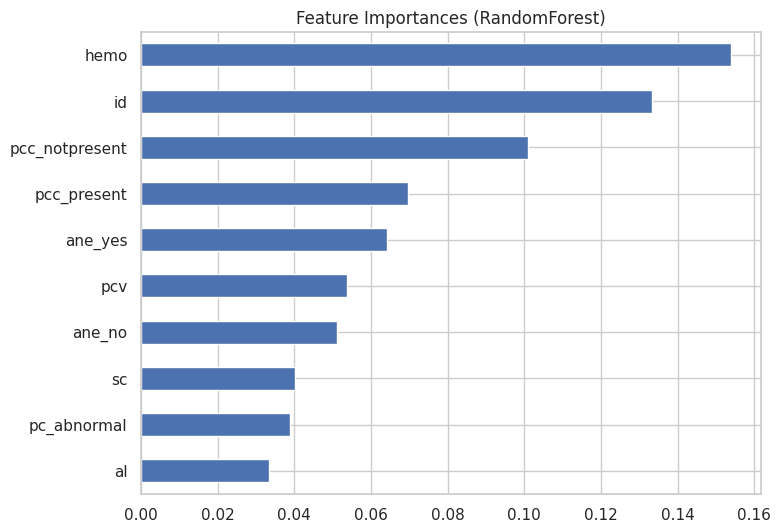


Generating SHAP summary plot...


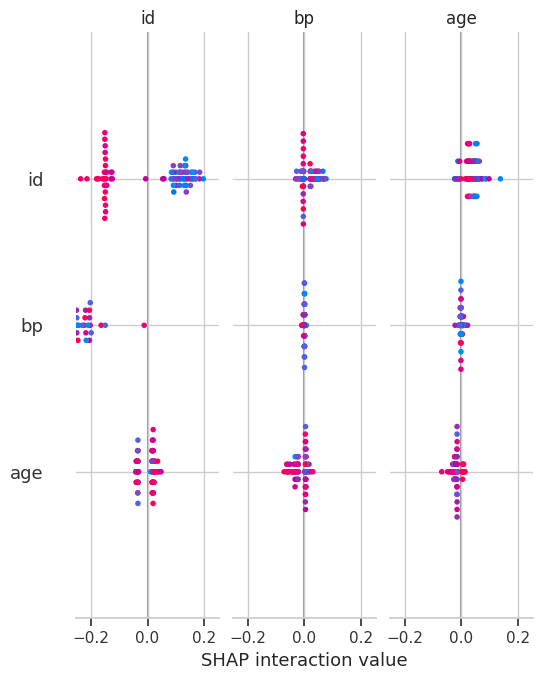

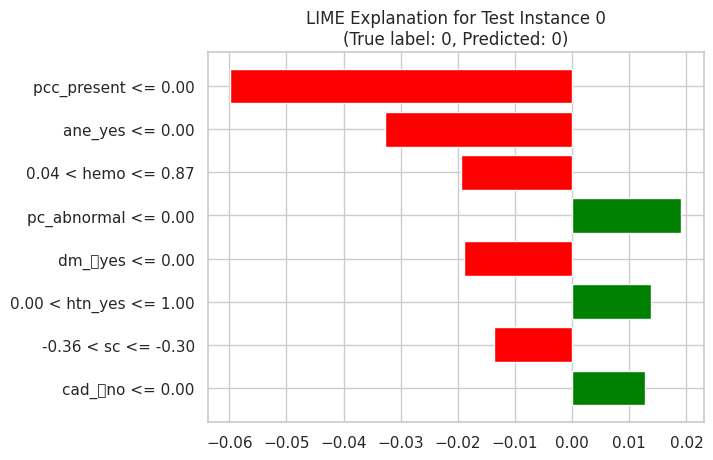


Generating PDP/ICE for feature: hemo


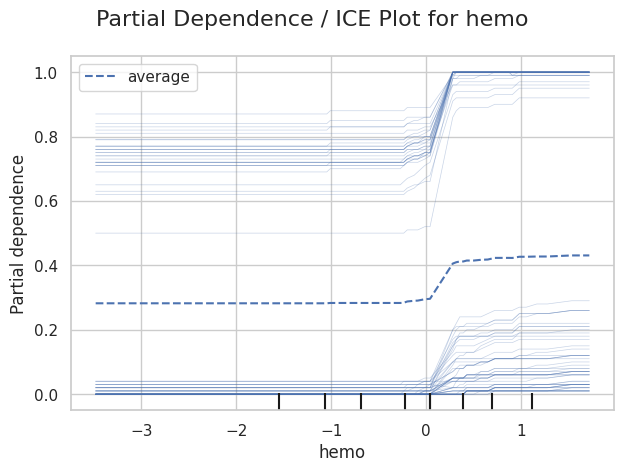


Generating PDP/ICE for feature: id


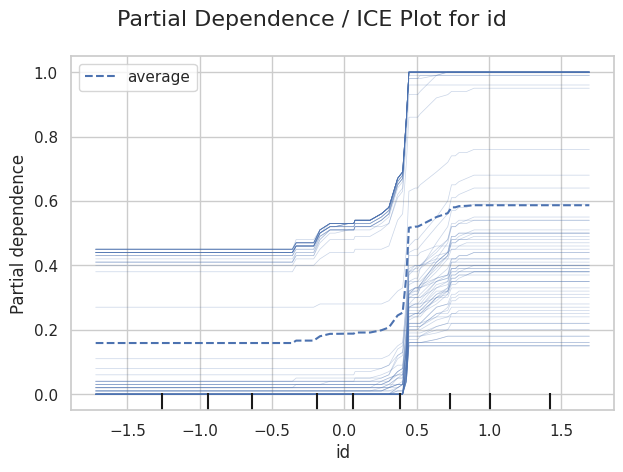


Generating PDP/ICE for feature: pcc_notpresent


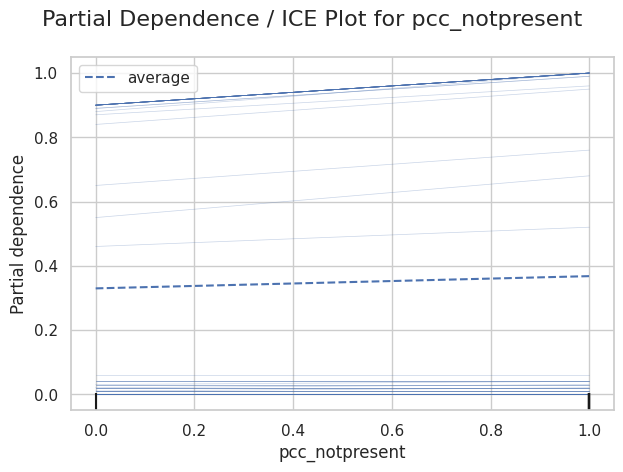

In [35]:
# ============================================================
# Full XAI Workflow for Kidney Dataset
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from lime.lime_tabular import LimeTabularExplainer
import shap

# ================================
# 0. Assumes X_train, X_test, y_train, y_test, feature_names are ready
# rf = trained RandomForest model
# ================================

# ----------------------------
# 1. Feature Importance
# ----------------------------
if hasattr(rf, 'feature_importances_'):
    importances = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
    print("\nTop 10 Feature Importances:")
    display(importances.head(10))

    plt.figure(figsize=(8,6))
    importances.head(10).plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title("Feature Importances (RandomForest)")
    plt.show()

# ----------------------------
# 2. SHAP summary plot
# ----------------------------
print("\nGenerating SHAP summary plot...")
explainer = shap.TreeExplainer(rf)
X_shap = X_test.sample(n=min(200, X_test.shape[0]), random_state=42)
X_shap_np = X_shap.values if hasattr(X_shap, 'values') else X_shap
shap_vals = explainer.shap_values(X_shap_np)

# Handle binary/multi-class
if isinstance(shap_vals, list) and len(shap_vals) > 1:
    plot_class_index = 1 if 1 in np.unique(y_test) else 0
    shap.summary_plot(shap_vals[plot_class_index], X_shap_np, feature_names=feature_names)
else:
    shap.summary_plot(shap_vals, X_shap_np, feature_names=feature_names)

# ----------------------------
# 3. LIME explanation for one sample
# ----------------------------
sample_idx = 0
X_train_for_lime = X_train if isinstance(X_train, pd.DataFrame) else pd.DataFrame(X_train, columns=feature_names)
lime_explainer = LimeTabularExplainer(
    training_data=X_train_for_lime.values,
    feature_names=feature_names,
    class_names=[f"Class_{l}" for l in sorted(np.unique(y_test))],
    discretize_continuous=True
)

instance = X_test.values[sample_idx] if hasattr(X_test, 'values') else X_test.iloc[sample_idx]
exp = lime_explainer.explain_instance(instance, rf.predict_proba, num_features=8)

fig = exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Test Instance {sample_idx}\n(True label: {y_test[sample_idx]}, Predicted: {rf.predict([instance])[0]})")
plt.show()

# ----------------------------
# 4-6. PDP + ICE plots for top 3 features individually
# ----------------------------
top_features = ['hemo', 'id', 'pcc_notpresent']  # Replace with your top features

target_class_index = None
if hasattr(rf, 'classes_') and 2 in rf.classes_:  # Assuming class 2 is positive
    target_class_index = list(rf.classes_).index(2)

for feature in top_features:
    if feature in X_test.columns:
        print(f"\nGenerating PDP/ICE for feature: {feature}")
        PartialDependenceDisplay.from_estimator(
            rf,
            X_test,
            [feature],
            feature_names=feature_names,
            kind='both',
            target=target_class_index
        )
        plt.suptitle(f"Partial Dependence / ICE Plot for {feature}", fontsize=16)
        plt.tight_layout()
        plt.show()